# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [106]:
#Save URL config
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Create lists to hold values
location = []
country = []
date = []
latitude = []
longitude=[]
temp = []
humidity = []
cloudiness = []
windspeed = []

#Set index and set base numbers
i=0
s=1

# Loop through the list of cities and perform a JSON request for each
for city in cities:
    response = requests.get(query_url + city).json()
  
    # Determine if the response if valid (cod=200) and iterate index and set accordingly
    if response['cod']==200:
        i=i+1
        if i>=51:
            i=1
            s=s+1
            
#Print succesful request to terminal                    
        print(f'Processing record {i} of Set {s}| {city}')
        
#Append the previous lists with the city's data
        location.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])

#Print unsuccsessful request (cod <> 200) to terminal
    else:
        print('City not found. Skipping...')
        
     

Processing record 1 of Set 1| kaeo
Processing record 2 of Set 1| pilibanga
Processing record 3 of Set 1| shawinigan
Processing record 4 of Set 1| jamestown
Processing record 5 of Set 1| hithadhoo
Processing record 6 of Set 1| butaritari
Processing record 7 of Set 1| yellowknife
Processing record 8 of Set 1| vaini
City not found. Skipping...
Processing record 9 of Set 1| port alfred
City not found. Skipping...
Processing record 10 of Set 1| boma
Processing record 11 of Set 1| tuatapere
Processing record 12 of Set 1| torbay
Processing record 13 of Set 1| kapaa
Processing record 14 of Set 1| fort saint james
Processing record 15 of Set 1| poum
City not found. Skipping...
Processing record 16 of Set 1| atuona
Processing record 17 of Set 1| ust-maya
Processing record 18 of Set 1| ketchikan
Processing record 19 of Set 1| saint-philippe
Processing record 20 of Set 1| hirara
Processing record 21 of Set 1| tutoia
Processing record 22 of Set 1| mataura
Processing record 23 of Set 1| new norfolk


Processing record 38 of Set 4| aripuana
City not found. Skipping...
Processing record 39 of Set 4| port lincoln
Processing record 40 of Set 4| volzhskiy
Processing record 41 of Set 4| coihaique
Processing record 42 of Set 4| mahebourg
Processing record 43 of Set 4| halifax
City not found. Skipping...
Processing record 44 of Set 4| dikson
Processing record 45 of Set 4| rio casca
Processing record 46 of Set 4| mae sai
Processing record 47 of Set 4| avarua
City not found. Skipping...
Processing record 48 of Set 4| palafrugell
Processing record 49 of Set 4| severo-kurilsk
Processing record 50 of Set 4| isangel
Processing record 1 of Set 5| dongsheng
Processing record 2 of Set 5| adzhamka
Processing record 3 of Set 5| nikolskoye
Processing record 4 of Set 5| clyde river
Processing record 5 of Set 5| sechura
City not found. Skipping...
Processing record 6 of Set 5| nome
Processing record 7 of Set 5| los andes
Processing record 8 of Set 5| arraial do cabo
Processing record 9 of Set 5| los lla

Processing record 23 of Set 8| esil
Processing record 24 of Set 8| hun
Processing record 25 of Set 8| haines junction
Processing record 26 of Set 8| nantucket
Processing record 27 of Set 8| jaisinghnagar
Processing record 28 of Set 8| airai
Processing record 29 of Set 8| kuybysheve
Processing record 30 of Set 8| rakaia
Processing record 31 of Set 8| volosovo
Processing record 32 of Set 8| dwarka
Processing record 33 of Set 8| barcelos
Processing record 34 of Set 8| tessalit
Processing record 35 of Set 8| yatou
Processing record 36 of Set 8| palmer
Processing record 37 of Set 8| neuquen
Processing record 38 of Set 8| lavrentiya
Processing record 39 of Set 8| constitucion
Processing record 40 of Set 8| arona
Processing record 41 of Set 8| yamada
City not found. Skipping...
Processing record 42 of Set 8| lethem
City not found. Skipping...
Processing record 43 of Set 8| acari
Processing record 44 of Set 8| santomera
Processing record 45 of Set 8| ilulissat
Processing record 46 of Set 8| de

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
#Create dict of the lists
weather_dict={
    "City":location, 
    "Cloudiness": cloudiness,
    "Country": country, 
    "Date": date, 
    "Humidity": humidity,
    "Lat": latitude, 
    "Lng": longitude, 
    "Max Temp": temp, 
    "Wind Speed": windspeed
}
    
    
#Create data frame, format time from Unix to local (CST) and check counts ()
weather_df=pd.DataFrame(weather_dict)
weather_df['Date']=pd.to_datetime(weather_df['Date'], unit='s').dt.tz_localize('UTC').dt.tz_convert('US/Central').dt.date
weather_date=weather_df.iloc[0,3].strftime("%m/%d/%Y")
weather_df.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [108]:
#Export to csv
weather_df.to_csv(output_data_file)

#Display Data Frame
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kaeo,41,NZ,2019-06-27,95,-35.10,173.78,48.99,5.01
1,Pilibanga,0,IN,2019-06-27,33,29.49,74.08,95.81,12.68
2,Shawinigan,1,CA,2019-06-27,69,46.54,-72.75,75.99,10.29
3,Jamestown,0,AU,2019-06-27,70,-33.21,138.60,55.13,11.61
4,Hithadhoo,100,MV,2019-06-27,70,-0.60,73.08,83.57,5.32
5,Butaritari,2,KI,2019-06-27,73,3.07,172.79,83.57,12.46
6,Yellowknife,20,CA,2019-06-27,25,62.45,-114.38,59.00,9.17
7,Vaini,100,IN,2019-06-27,90,15.34,74.49,78.17,6.29
8,Port Alfred,0,ZA,2019-06-27,46,-33.59,26.89,63.00,5.99
9,Boma,97,GH,2019-06-27,98,7.08,-2.17,71.69,3.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

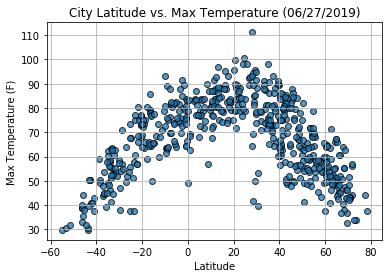

In [109]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'],marker="o", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

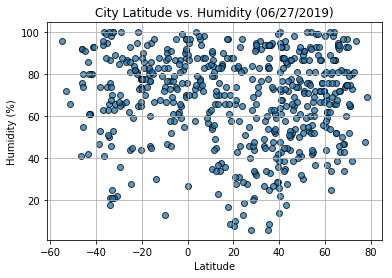

In [110]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'],marker="o", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

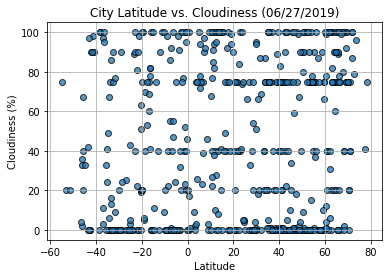

In [111]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],marker="o", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

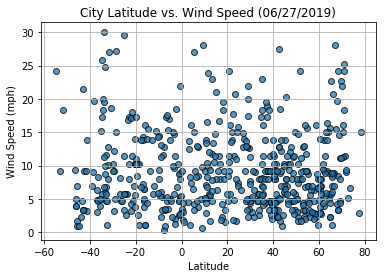

In [112]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],marker="o", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Lat_vs_Wind_Speed.png")
plt.show()

Conclusions:

A number of conclusions can be drawn from the selected data. First, we see that a larger concentration of our data points are in the northern hemisphere. This is to be expected as 68% of the earth's landmass is found in this hemisphere so more data points would be found here. With respect to temperature, logic says we would see a normal distribution with the mean at the equator. While a normal distribution is observed, the mean is around 20 degrees north of the equator. As the earth just passed through the summer solstice, this is the peak tilt of the earth to the north (hence summer in the northern hemisphere and winter in the southern). This would explain the shift of the mean, and we would expect to see the same phenomenon in the opposite direction in 6 months at the time of the winter solstice. With respect to humidity, we see lower percentages as a whole in the northern hemisphere, and overall, we see that a majority of cities across the world have a humidity higher than 60%. Cloudiness appears to be standard across all latitudes, with concentrations in the 0%, 40%, 75%, and 100% levels. Finally, there doesn't appear to be a relationship between latitude and wind speed.